<a href="https://colab.research.google.com/github/adilcansuvakci/DSA210_TermProject/blob/main/DSA210Proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving chartIstanbul.csv to chartIstanbul.csv
Saving chartSabiha.csv to chartSabiha.csv
Saving HavaDurumu_25.4.xlsx to HavaDurumu_25.4.xlsx


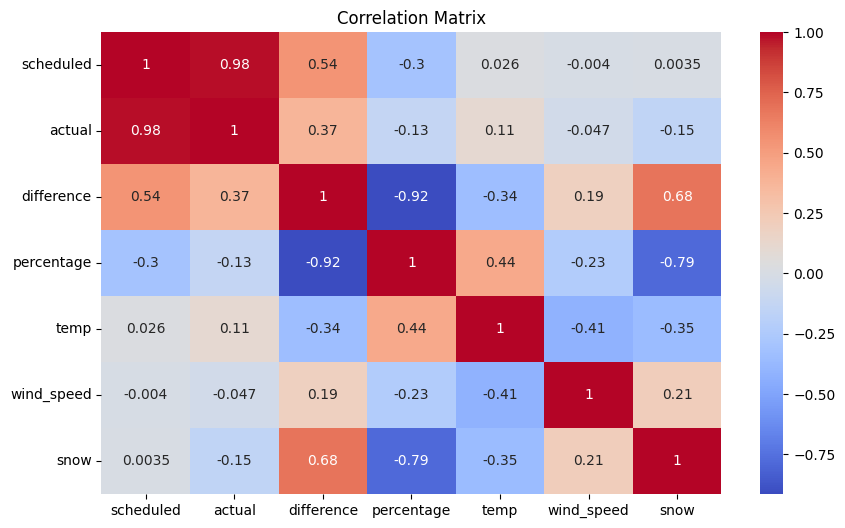

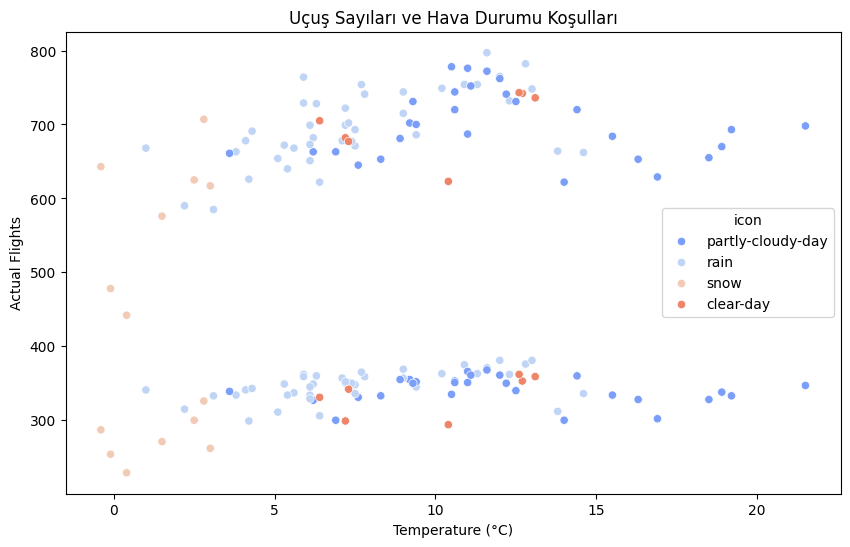

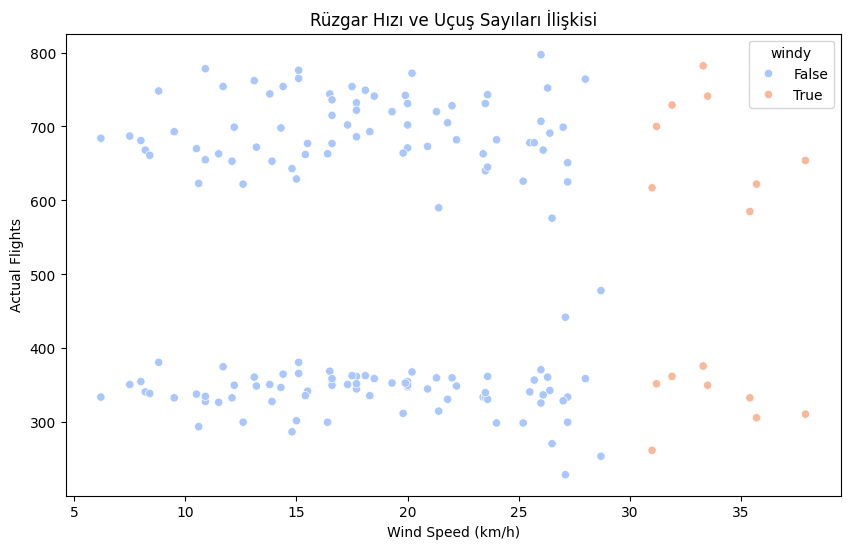

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uçuş verilerini doğru şekilde ayıralım
sabiha = pd.read_csv('chartSabiha.csv', sep=';')
istanbul = pd.read_csv('chartIstanbul.csv', sep=';')

# Hava durumu verisini doğru şekilde oku
weather = pd.read_excel('HavaDurumu_25.4.xlsx')

# Sütun isimlerini temizle
sabiha.columns = sabiha.columns.str.strip()
istanbul.columns = istanbul.columns.str.strip()
weather.columns = weather.columns.str.strip()

# Tarih formatını düzelt (Uçuş verisinde DateTime kullanılıyor)
sabiha['DateTime'] = pd.to_datetime(sabiha['DateTime'], format='%d.%m.%Y') # 'Date' yerine 'DateTime' kullan, formatı belirt
istanbul['DateTime'] = pd.to_datetime(istanbul['DateTime'], format='%d.%m.%Y') # 'Date' yerine 'DateTime' kullan, formatı belirt
weather['Date'] = pd.to_datetime(weather['datetime']) # Hava durumu verisi için format doğru olabilir

# Havalimanı etiketlerini ekle
sabiha['airport'] = 'SAW'
istanbul['airport'] = 'IST'

# Uçuş verilerini birleştir
flights = pd.concat([sabiha, istanbul], ignore_index=True)

# Kolon isimlerini daha anlaşılır hale getir
flights.rename(columns={
    'DateTime': 'date',  # 'DateTime'  kullanıyoruz
    'Scheduled flights': 'scheduled',
    'Tracked flights': 'actual',
    'Percentage': 'percentage'
}, inplace=True)

# Gerçekleşme yüzdesini düzelt
flights['percentage'] = flights['percentage'].str.replace('%','').str.replace(',','.').astype(float) / 100

# Fark hesapla
flights['difference'] = flights['scheduled'] - flights['actual']

# Hava durumu verisini birleştir
weather.rename(columns={
    'Date': 'date',  # Hava durumu verisinde 'Date' kullanıyoruz
    'Temperature': 'temperature',
    'Humidity': 'humidity',
    'Snow': 'snow',
    'windgust': 'wind_gust',
    'windspeed': 'wind_speed',
    'Pressure': 'pressure',
    'cloudcover': 'cloud_cover',
    'visibility': 'visibility',
    'Condition': 'condition'
}, inplace=True)

# Hava durumu koşullarını etiketle
weather['rainy'] = weather['icon'].str.contains('Rain', case=False)
weather['snowy'] = weather['icon'].str.contains('Snow', case=False)
weather['partly_cloudy'] = weather['icon'].str.contains('Partly Cloudy', case=False)
weather['clear'] = weather['icon'].str.contains('Clear', case=False)

# Rüzgarlı günleri etiketle
weather['windy'] = weather['wind_speed'] > 30  # Bu eşiği ihtiyaca göre ayarlayabiliriz

# Uçuş verilerini hava durumu verisiyle birleştir
merged = pd.merge(flights, weather, on='date', how='left')

# --- 📊 Correlation Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(merged[['scheduled', 'actual', 'difference', 'percentage',
                    'temp', 'wind_speed', 'snow']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# --- 📊 Scatter Plot: Uçuşlar ve Hava Durumu Koşulları ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='actual', data=merged, hue='icon', palette='coolwarm')
plt.title('Uçuş Sayıları ve Hava Durumu Koşulları')
plt.xlabel('Temperature (°C)')
plt.ylabel('Actual Flights')
plt.show()

# --- 📊 Rüzgar ve Uçuş Sayıları İlişkisi ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='wind_speed', y='actual', data=merged, hue='windy', palette='coolwarm')
plt.title('Rüzgar Hızı ve Uçuş Sayıları İlişkisi')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Actual Flights')
plt.show()


In [ ]:
# Sütun adlarını kontrol edelim
print("Sabiha uçuş verisi sütunları:")
print(sabiha.columns)

print("\nİstanbul uçuş verisi sütunları:")
print(istanbul.columns)

print("\nHava durumu verisi sütunları:")
print(weather.columns)


Sabiha uçuş verisi sütunları:
Index(['DateTime', 'Scheduled flights', 'Tracked flights', 'Percentage'], dtype='object')

İstanbul uçuş verisi sütunları:
Index(['DateTime', 'Scheduled flights', 'Tracked flights', 'Percentage'], dtype='object')

Hava durumu verisi sütunları:
Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')


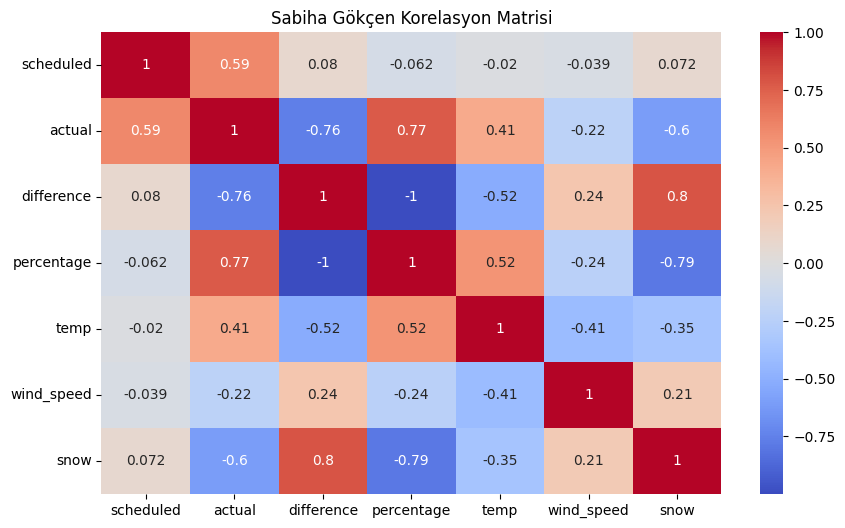

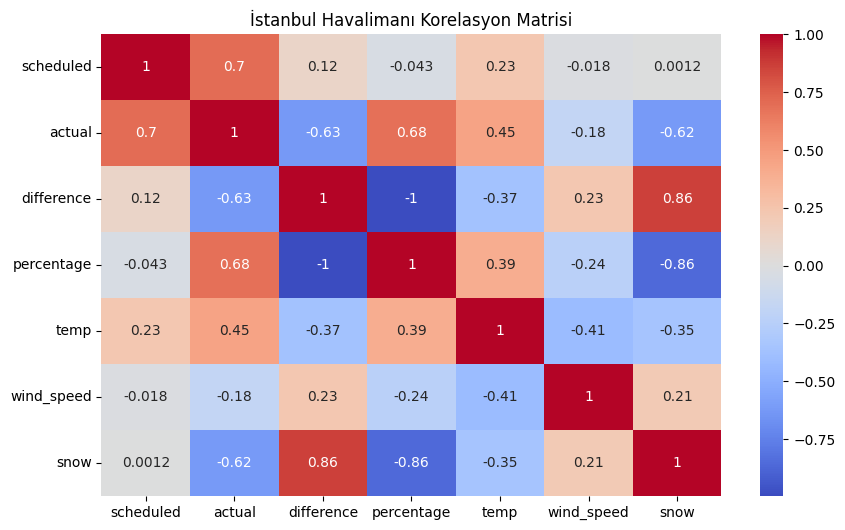

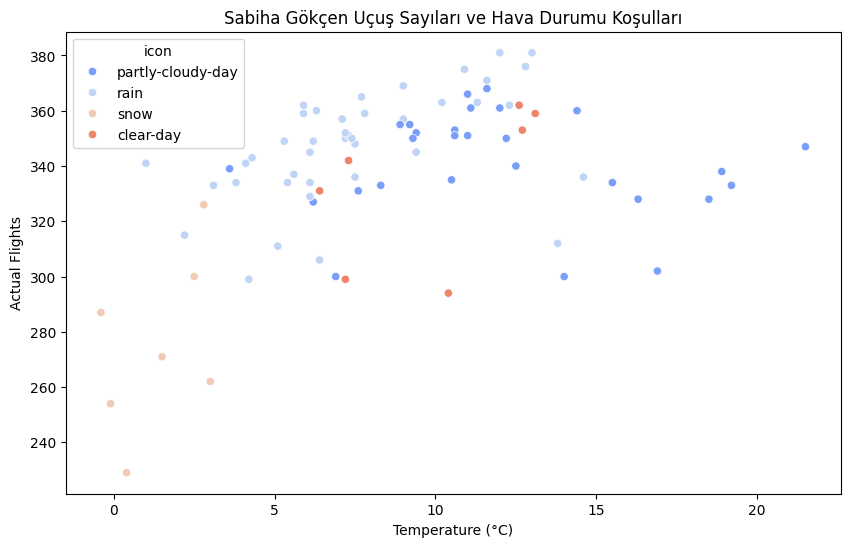

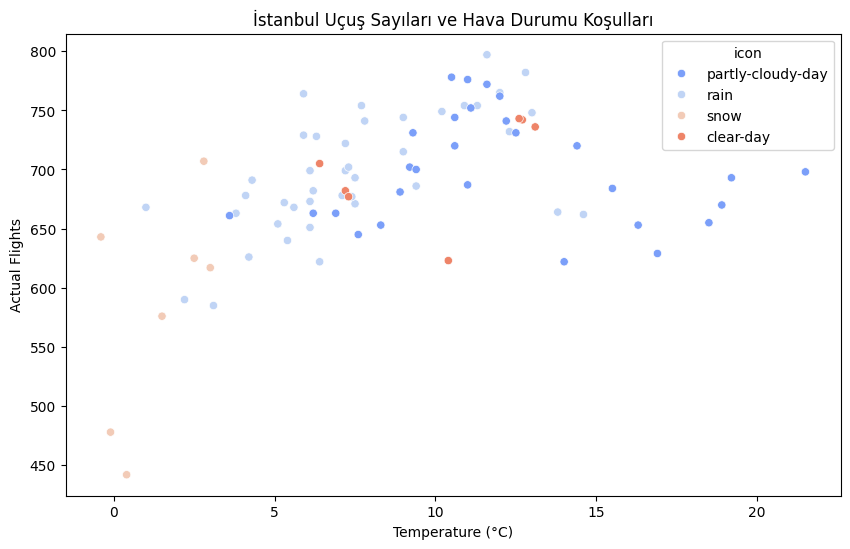

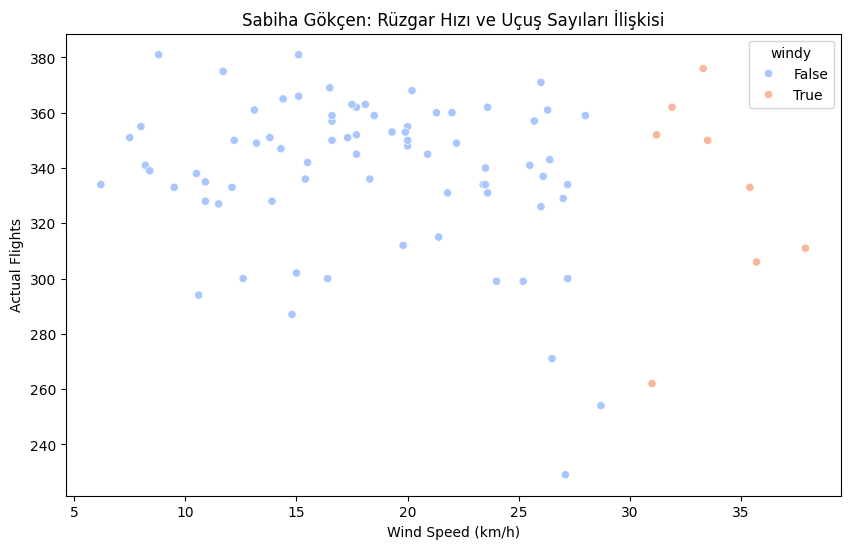

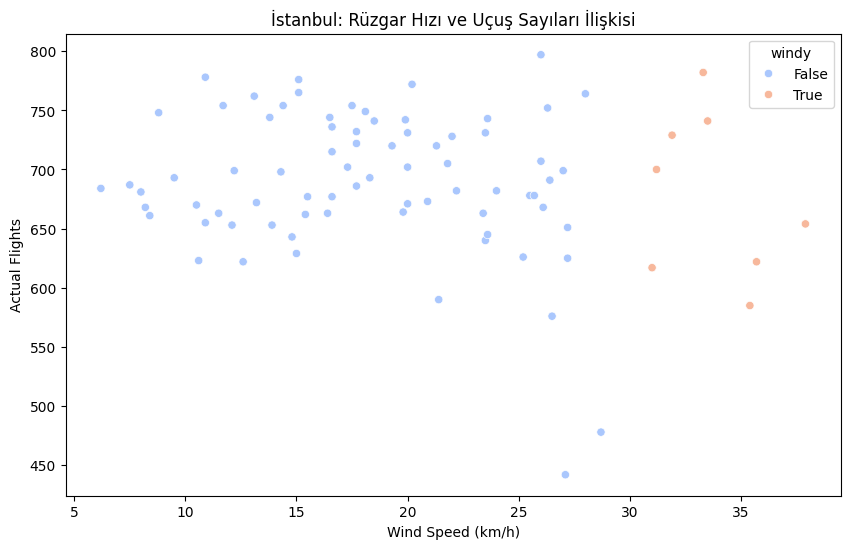

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uçuş verilerini doğru şekilde ayıralım
sabiha = pd.read_csv('chartSabiha.csv', sep=';')
istanbul = pd.read_csv('chartIstanbul.csv', sep=';')

# Hava durumu verisini doğru şekilde oku
weather = pd.read_excel('HavaDurumu_25.4.xlsx')

# Sütun isimlerini temizle
sabiha.columns = sabiha.columns.str.strip()
istanbul.columns = istanbul.columns.str.strip()
weather.columns = weather.columns.str.strip()

# Tarih formatını düzelt (Uçuş verisinde DateTime kullanılıyor)
sabiha['DateTime'] = pd.to_datetime(sabiha['DateTime'], format='%d.%m.%Y')
istanbul['DateTime'] = pd.to_datetime(istanbul['DateTime'], format='%d.%m.%Y')
weather['Date'] = pd.to_datetime(weather['datetime']) # Hava durumu verisi için format doğru olabilir

# Havalimanı etiketlerini ekle
sabiha['airport'] = 'SAW'
istanbul['airport'] = 'IST'

# Uçuş verilerini birleştir
flights = pd.concat([sabiha, istanbul], ignore_index=True)

# Kolon isimlerini daha anlaşılır hale getir
flights.rename(columns={
    'DateTime': 'date',  # 'DateTime'  kullanıyoruz
    'Scheduled flights': 'scheduled',
    'Tracked flights': 'actual',
    'Percentage': 'percentage'
}, inplace=True)

# Gerçekleşme yüzdesini düzelt
flights['percentage'] = flights['percentage'].str.replace('%','').str.replace(',','.').astype(float) / 100

# Fark hesapla
flights['difference'] = flights['scheduled'] - flights['actual']

# Hava durumu verisini birleştir
weather.rename(columns={
    'Date': 'date',
    'Temperature': 'temperature',
    'Humidity': 'humidity',
    'Snow': 'snow',
    'windgust': 'wind_gust',
    'windspeed': 'wind_speed',
    'Pressure': 'pressure',
    'cloudcover': 'cloud_cover',
    'visibility': 'visibility',
    'Condition': 'condition'
}, inplace=True)

# Hava durumu koşullarını etiketle
weather['rainy'] = weather['icon'].str.contains('Rain', case=False)
weather['snowy'] = weather['icon'].str.contains('Snow', case=False)
weather['partly_cloudy'] = weather['icon'].str.contains('Partly Cloudy', case=False)
weather['clear'] = weather['icon'].str.contains('Clear', case=False)

# Rüzgarlı günleri etiketle
weather['windy'] = weather['wind_speed'] > 30  # Bu eşiği ihtiyaca göre ayarlayabiliriz

# Hava durumu verilerini her havalimanı için ayrı ayrı birleştir
sabiha_weather = pd.merge(sabiha, weather, left_on='DateTime', right_on='date', how='left') # Use 'DateTime' for sabiha and 'date' for weather
istanbul_weather = pd.merge(istanbul, weather, left_on='DateTime', right_on='date', how='left') # Use 'DateTime' for istanbul and 'date' for weather

# Kolon isimlerini sabiha_weather ve istanbul_weather için de güncelle
sabiha_weather.rename(columns={
    'Scheduled flights': 'scheduled',
    'Tracked flights': 'actual',
    'Percentage': 'percentage'
}, inplace=True)
sabiha_weather['percentage'] = sabiha_weather['percentage'].str.replace('%','').str.replace(',','.').astype(float) / 100
sabiha_weather['difference'] = sabiha_weather['scheduled'] - sabiha_weather['actual']


istanbul_weather.rename(columns={
    'Scheduled flights': 'scheduled',
    'Tracked flights': 'actual',
    'Percentage': 'percentage'
}, inplace=True)
istanbul_weather['percentage'] = istanbul_weather['percentage'].str.replace('%','').str.replace(',','.').astype(float) / 100
istanbul_weather['difference'] = istanbul_weather['scheduled'] - istanbul_weather['actual']

# --- 📊 Sabiha Gökçen Havalimanı için Korelasyon Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(sabiha_weather[['scheduled', 'actual', 'difference', 'percentage',
                            'temp', 'wind_speed', 'snow']].corr(), # 'temp' yerine 'temperature' kullanın
            annot=True, cmap='coolwarm')
plt.title('Sabiha Gökçen Korelasyon Matrisi')
plt.show()

# --- 📊 İstanbul Havalimanı için Korelasyon Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(istanbul_weather[['scheduled', 'actual', 'difference', 'percentage',
                              'temp', 'wind_speed', 'snow']].corr(),
            annot=True, cmap='coolwarm')
plt.title('İstanbul Havalimanı Korelasyon Matrisi')
plt.show()

# --- 📊 Sabiha Gökçen Havalimanı: Uçuş Sayıları ve Hava Durumu Koşulları ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='actual', data=sabiha_weather, hue='icon', palette='coolwarm')
plt.title('Sabiha Gökçen Uçuş Sayıları ve Hava Durumu Koşulları')
plt.xlabel('Temperature (°C)')
plt.ylabel('Actual Flights')
plt.show()

# --- 📊 İstanbul Havalimanı: Uçuş Sayıları ve Hava Durumu Koşulları ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='actual', data=istanbul_weather, hue='icon', palette='coolwarm')
plt.title('İstanbul Uçuş Sayıları ve Hava Durumu Koşulları')
plt.xlabel('Temperature (°C)')
plt.ylabel('Actual Flights')
plt.show()

# --- 📊 Sabiha Gökçen: Rüzgar Hızı ve Uçuş Sayıları İlişkisi ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='wind_speed', y='actual', data=sabiha_weather, hue='windy', palette='coolwarm')
plt.title('Sabiha Gökçen: Rüzgar Hızı ve Uçuş Sayıları İlişkisi')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Actual Flights')
plt.show()

# --- 📊 İstanbul Havalimanı: Rüzgar Hızı ve Uçuş Sayıları İlişkisi ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='wind_speed', y='actual', data=istanbul_weather, hue='windy', palette='coolwarm')
plt.title('İstanbul: Rüzgar Hızı ve Uçuş Sayıları İlişkisi')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Actual Flights')
plt.show()


In [ ]:
!pip install scipy pandas

In [ ]:
from scipy import stats

# Sabiha Gökçen ve İstanbul Havalimanı için uçuş sayılarındaki farkı test et
sabiha_actual = sabiha_weather['actual']
istanbul_actual = istanbul_weather['actual']

# Paired T-Test
t_stat, p_value = stats.ttest_rel(sabiha_actual, istanbul_actual)

print("Paired T-Test for Flights Comparison (Sabiha vs Istanbul):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Paired T-Test for Flights Comparison (Sabiha vs Istanbul):
T-statistic: -81.82949406927871
P-value: 2.1742976655200686e-80


In [ ]:
# Rüzgarlı günler ve rüzgarsız günler için uçuş sayıları karşılaştırması
windy_flights = sabiha_weather[sabiha_weather['windy'] == True]['actual']
non_windy_flights = sabiha_weather[sabiha_weather['windy'] == False]['actual']

# Independent T-Test
t_stat, p_value = stats.ttest_ind(windy_flights, non_windy_flights)

print("Independent T-Test for Windy vs Non-Windy Days (Sabiha):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Independent T-Test for Windy vs Non-Windy Days (Sabiha):
T-statistic: -0.6767096112883537
P-value: 0.5005181731463337


In [ ]:
# Hava durumu koşullarına göre uçuş sayıları arasındaki fark
conditions = ['rainy', 'snowy', 'partly_cloudy', 'clear']

# Uçuş sayılarının koşullara göre gruplandırılması
flight_data = []
for icon in conditions:
    flight_data.append(sabiha_weather[sabiha_weather[icon] == True]['actual'])

# ANOVA testi
f_stat, p_value = stats.f_oneway(*flight_data)

print("ANOVA for Flight Counts by Weather Conditions (Sabiha):")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


ANOVA for Flight Counts by Weather Conditions (Sabiha):
F-statistic: nan
P-value: nan


<ipython-input-51-3a746b4a046a>:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*flight_data)


In [ ]:
# Örnek: Rüzgarlı ve rüzgarsız günler için uçuş sayısı
t_stat, p_value = stats.mannwhitneyu(windy_flights, non_windy_flights)

print("Mann-Whitney U Test (Rüzgarlı vs Rüzgarsız Günler - Sabiha):")
print(f"U-statistic: {t_stat}")
print(f"P-value: {p_value}")


Mann-Whitney U Test (Rüzgarlı vs Rüzgarsız Günler - Sabiha):
U-statistic: 276.0
P-value: 0.7168158720387011
